# Визуализация деревьев решений и нейронок scikit-learn

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_tree(clf, feature_names = None, figsize = (6,6), font = None):
    def get_tree_size(t, i = 0, d = 0, h = 0):
        r = t.tree_.children_right[i]
        d_out, h_out = d, h
        if r>=0:
            d1, h1 =get_tree_size(t, r, d+1, h)
            d_out = max(d_out, d1)
            h_out = max(h_out, h1)
            h = h_out
        l = t.tree_.children_left[i]
        if l>=0:
            d1, h1 = get_tree_size(t, l, d+1, h+1)
            d_out = max(d_out, d1)
            h_out = max(h_out, h1)
            h = h_out
        return d_out, h_out

    def plot_node(t, ax, feature_names, font, i = 0, d = 0, h = 0, scale = [1,1]):
        
        y_co = 0.9 - d/scale[0] * 0.8
        x_co = h/scale[1] * 0.8 + 0.1
        rad = min(0.1, 0.35/max(scale))
        
        circle = plt.Circle((x_co, y_co), rad, color = 'w', ec = 'b')
        ax.add_artist(circle)

        r = t.tree_.children_right[i]
        if r>=0:
            h0 = h
            h = max(h, plot_node(t, ax,feature_names, font, r, d+1, h, scale))
            line = plt.Line2D((x_co, x_co), ( y_co-rad, y_co-0.8/scale[0]+rad), color = 'g')
            ax.add_artist(line)
            plt.text(x_co, y_co-0.8/scale[0]*0.5, 'Y', font)
        l = t.tree_.children_left[i]

        if l>=0:
            h1 = h + 1
            h = max(h, plot_node(t, ax, feature_names,font, l, d+1, h+1, scale))
            line = plt.Line2D((x_co+rad, 0.1+0.8/scale[1]*h1), ( y_co, y_co - 0.8/scale[0]+rad), color = 'r')
            ax.add_artist(line)
            plt.text((x_co+rad+0.1+0.8/scale[1]*h1)*0.5, y_co-0.8/scale[0]*0.5, 'N', font)
        if t.tree_.feature[i] == -2:
            txt = 'Class ' + np.argmax(t.tree_.value[i][0]).astype(str) + '\n' + str(t.tree_.value[i][0].astype(int))
        else:
            txt = feature_names[t.tree_.feature[i]] + '\n<' + "%.4G" % t.tree_.threshold[i]
        plt.text(x_co-rad*0.9, y_co-rad * 0.5, txt, font)
        
        return h
    dmax, hmax = get_tree_size(clf)
    
    if feature_names is None:
        feature_names = ['f'+i for i in range(clf.n_features_)]
    
    if font is None:
        font = {'family': 'Verdana', 'size':10}
    
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.axis('off')
    plot_node(clf, ax, feature_names, font, scale = [dmax, hmax])
    return ax



In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

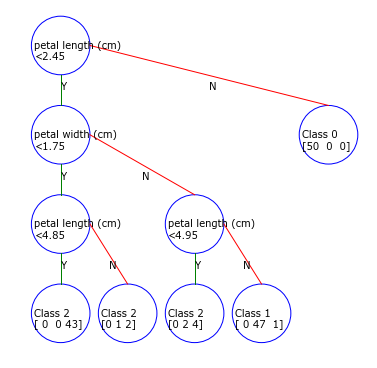

In [4]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(iris.data, iris.target)
plot_tree(clf, feature_names = iris.feature_names, font = {'family': 'Verdana', 'size':10})

In [16]:
from sklearn.neural_network import MLPClassifier
nn  = MLPClassifier(hidden_layer_sizes = (5), activation = 'logistic', alpha =1, max_iter = 10000).fit(iris.data, iris.target)

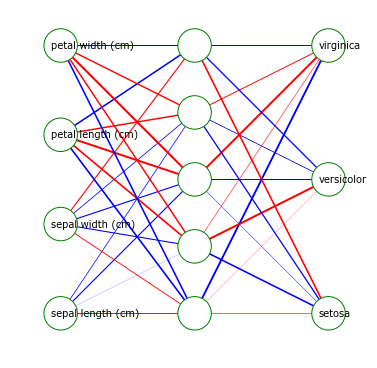

In [18]:
def plot_nn(nn, x = None, feature_names = None, class_names = None, font = None,  figsize = (6,6), instance = None):
    x_dim = nn.coefs_[0].shape[0]
    y_dim = nn.coefs_[-1].shape[1]
    if x is None:
        x_std = np.arange(x_dim)*0+1
    else:
        x_std = np.std(iris.data, axis = 0)
    
    if feature_names is None:
        feature_names = ['x_'+str(i) for i in range(x_dim)]
    if class_names is None:
        class_names = ['c_'+str(i) for i in range(y_dim)]
    if font is None:
        font = {'family': 'Verdana', 'size':10}
    
    
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.axis('off')
    l = len(nn.coefs_)
    for d, layer in enumerate(nn.coefs_):
        n_in, n_out = layer.shape
        lmax = layer.max()
        for i in range(n_in):
            for j in range(n_out):
                line = plt.Line2D((d/l*0.8+0.1, (d+1)/l*0.8+0.1), (i/(n_in-1)*0.8+0.1, j/(n_out-1)*0.8+0.1), zorder=-1
                                  , color = 'red' if layer[i,j] > 0 else 'blue'
                                  , linewidth = abs(layer[i,j])/lmax*2)
                ax.add_artist(line)
            circle = plt.Circle((d/l*0.8+0.1, i/(n_in-1)*0.8+0.1), 0.05, color = 'w', ec = 'g')
            ax.add_artist(circle)
    for i in range(n_out):
        circle = plt.Circle((0.8+0.1, i/(n_out-1)*0.8+0.1), 0.05, color = 'w', ec = 'g')
        ax.add_artist(circle)
    if instance is None:
        for i in range(x_dim):
            plt.text(0.1-0.03, i/(x_dim-1)*0.8+0.1-0.01, feature_names[i], font)
        for i in range(y_dim):
            plt.text(0.8+0.1-0.03, i/(y_dim-1)*0.8+0.1-0.01, class_names[i], font)
    else:
        pass
        # здесь я хочу печатать значения нейронки в каждом из нейронов на данном образце
        # а лучше даже раскрашивать кружки
    return ax
_ = plot_nn(nn, feature_names = iris.feature_names, class_names = iris.target_names, figsize = (6,6))